<a href="https://colab.research.google.com/github/Matias-Bustamante/MachineLearning/blob/main/EDA/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [9]:
## Analisis exploratorio de los datos
url='https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
data=pd.read_csv(url, sep=';')
data.head(5)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [15]:
## Muesto cantidad de columnas y filas
print("Cantidad de Filas: "+str(data.shape[0]))
print("Cantidad de columnas: "+str(data.shape[1]))
print("Nombre de columnas: "+data.columns)

Cantidad de Filas: 252
Cantidad de columnas: 19
Index(['Nombre de columnas: alpha_2', 'Nombre de columnas: alpha_3',
       'Nombre de columnas: area', 'Nombre de columnas: capital',
       'Nombre de columnas: continent', 'Nombre de columnas: currency_code',
       'Nombre de columnas: currency_name',
       'Nombre de columnas: eqivalent_fips_code', 'Nombre de columnas: fips',
       'Nombre de columnas: geoname_id', 'Nombre de columnas: languages',
       'Nombre de columnas: name', 'Nombre de columnas: neighbours',
       'Nombre de columnas: numeric', 'Nombre de columnas: phone',
       'Nombre de columnas: population',
       'Nombre de columnas: postal_code_format',
       'Nombre de columnas: postal_code_regex', 'Nombre de columnas: tld'],
      dtype='object')


In [18]:
## Descripcion de conjuntos de datos numericos

data.describe()

## Visualizo tipo de datos de las columnas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

<ipython-input-29-82d36ce8053a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


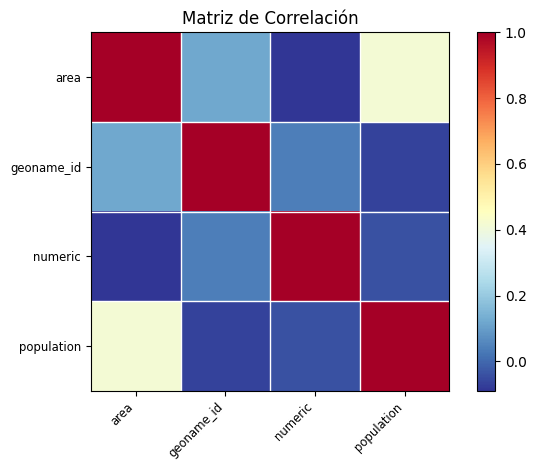

In [29]:
corr=data.corr()
ax=sm.graphics.plot_corr(corr, xnames=list(corr.columns), title='Matriz de Correlación')
plt.show()


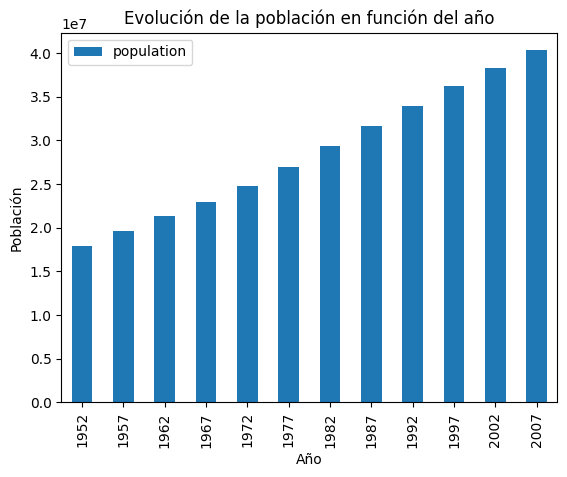

In [80]:
url2='https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
data2=pd.read_csv(url2, sep=',')
arg=data2[data2['country']=='Argentina']
g=arg.plot(x='year',kind='bar')
plt.title("Evolución de la población en función del año")
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

<Axes: >

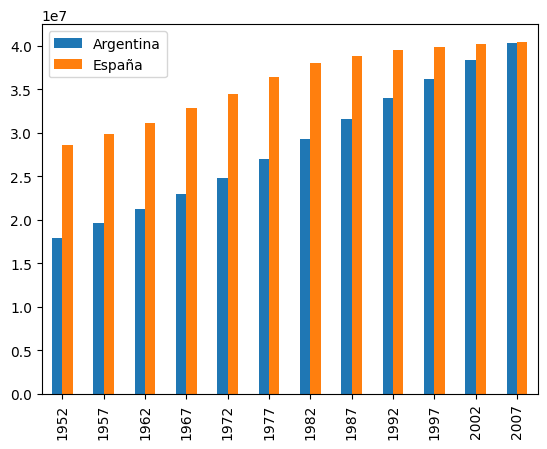

In [76]:
anio=data2['year'].unique()
arg=data2[(data2['country']=='Argentina')]['population'].values
spain=data2[data2['country']=='Spain']['population'].values
nuevaData=pd.DataFrame({'Argentina':arg, 'España':spain}, index=anio)
nuevaData.plot(kind='bar')

Text(0.5, 1.0, 'Cantidad de Población y Area por paises')

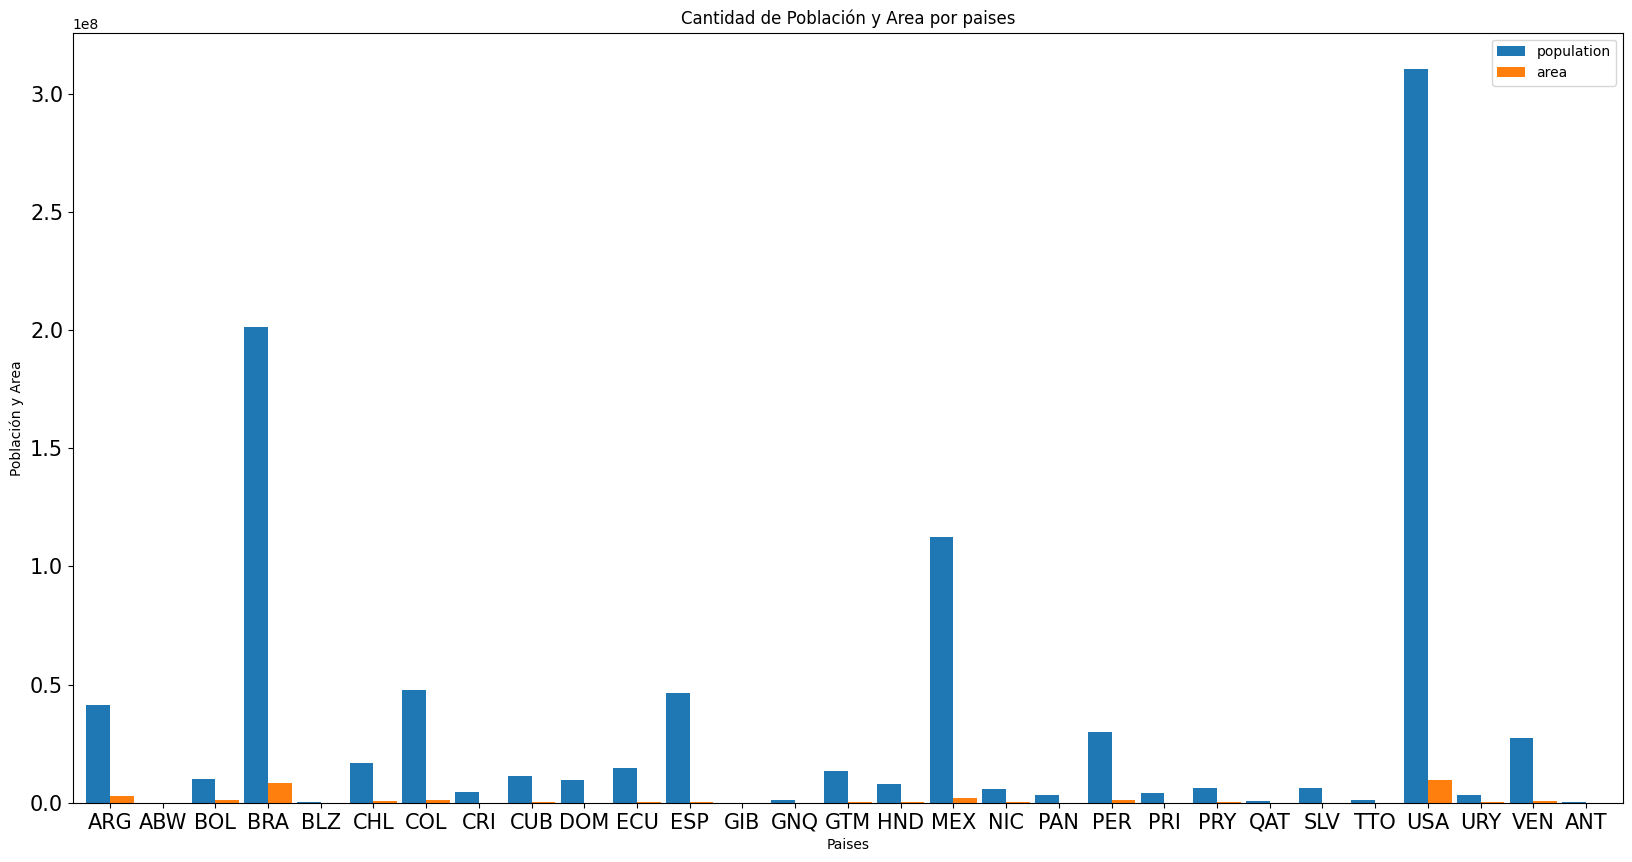

In [110]:
## Filtramos todos los paises hispano-hablantes
data=data.replace(np.nan,'', regex=True)
languages=data[data['languages'].str.contains('es')]
languages.set_index('alpha_3')[['population','area']].plot(kind='bar', rot=0, width=0.9, figsize=(20,10), fontsize=15)
plt.xlabel('Paises')
plt.ylabel('Población y Area')
plt.title('Cantidad de Población y Area por paises')

Limite Inferior: -1706860.672319265
LImite Superior: 5183063.581410174


<ipython-input-140-05a53b8c22fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(outliers,inplace=True)


<Axes: xlabel='alpha_3'>

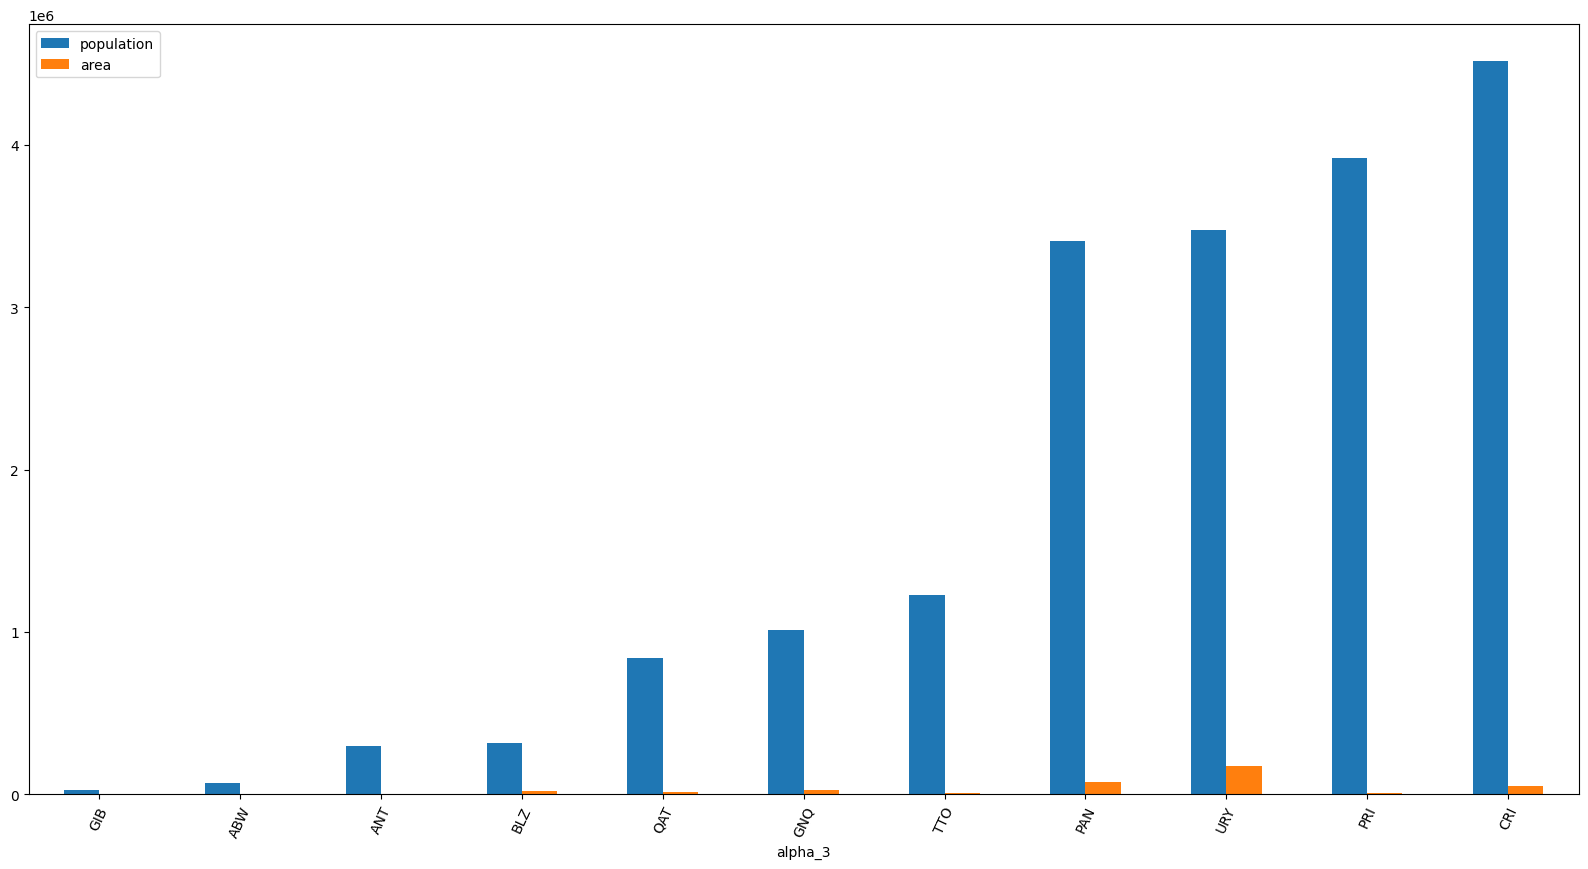

In [140]:
## Detección de outliers

def outliers(data):
  outliers=list();
  desvio=data.std()
  media=data.mean()
  limite_inferior=media-2*desvio;
  limite_superior=media+2*desvio;
  print("Limite Inferior: "+str(limite_inferior.iloc[0]));
  print("LImite Superior: "+str(limite_superior.iloc[0]));

  for index, row in data.iterrows():
    if (row.iloc[0]>limite_superior[0]) or (row.iloc[0]<limite_inferior[0]):
      outliers.append(index)
  return outliers

outliers=outliers(data[['population']])
data.drop(outliers,inplace=True)
data=data[data['languages'].str.contains('es')]
data.set_index('alpha_3')[['population', 'area']].sort_values(['population']).plot(kind='bar', rot=65, figsize=(20,10))